In [112]:
import numpy as np
import spectral
from PIL import Image
import os
import matplotlib.pyplot as plt


In [151]:
## root directory
ROOT_DIR = './18_04_2019_M/'
# ROOT_DIR10 = './data/Accra/IMG_DATA/R10m'

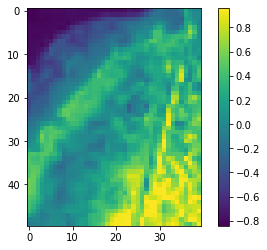

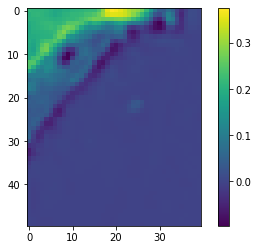

In [152]:
import tifffile 
import numpy as np 
import matplotlib.pyplot as plt
import spectral

# B04 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
# B08 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B08_(Raw).tiff')

# B11 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
# B06 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B06_(Raw).tiff')

# B01 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B01_(Raw).tiff')
# B02 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
# B03 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
# B05 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B05_(Raw).tiff')
# B07 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B07_(Raw).tiff')
# B09 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B09_(Raw).tiff')

# B8A = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B8A_(Raw).tiff')
# B12 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B12_(Raw).tiff')


B04 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
B08 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B08_(Raw).tiff')

B11 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
B06 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B06_(Raw).tiff')

B01 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B01_(Raw).tiff')
B02 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
B03 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
B05 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B05_(Raw).tiff')
B07 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B07_(Raw).tiff')
B09 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B09_(Raw).tiff')

B8A = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B8A_(Raw).tiff')
B12 = tifffile.imread(ROOT_DIR+'2019-04-18-00_00_2019-04-18-23_59_Sentinel-2_L2A_B12_(Raw).tiff')


RNDVI =(B04-B08)/(B04+B08)
PI = B08/(B04+B08)
lambda_8 = 833.8
lambda_4 = 664.6
lambda_11 = 1613.7
lambda_6 = 740.5
FDI = B08 - ( B06 + (B11-B06)*10*(lambda_8-lambda_4)/(lambda_11-lambda_4) )

plt.figure()
plt.imshow(RNDVI[20:70,100:140])
plt.colorbar()
plt.figure()
plt.imshow(FDI[20:70,100:140])
plt.colorbar()

In [153]:
# array of images
ind=[39,50,120,130] # [ind[0]:ind[1],ind[2]:ind[3]]

arrays=[B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12]
# arrays=[B02,B03,B04,B08,B8A]

In [154]:
from sklearn.preprocessing import normalize
arrays_flat=np.array([e[ind[0]:ind[1],ind[2]:ind[3]].flatten() for e in arrays])

print(arrays_flat.shape)

(12, 110)


In [155]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 

X=(np.transpose(arrays_flat))

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
  
for k in K: 
    print(k)
    #Building and fitting the model 
    kmeans = KMeans(n_clusters=k,  init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeans.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeans.inertia_ 



1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [156]:
print((kmeans.labels_))

[ 6  6  6 13 13 13  3  3  2  2  6  6  6 13  9 11 11 11  3  2  6  6  6  9
 10  5  1  7  3 12  0  6  6  9 10  5  1  7  3 12  0  0 13  9  4  4 11 11
  3 12  0  0 13 13 13  3  3  3 12 12  0  0  0 13  2  2  2 12 12 12  0  0
  8  8  2  2  2 12 12 12  8  8  8  8  2  2  2 12 12 12  8  8  8  2  2  2
 12 12 12 12  8  8  8  2  2  2 12 12 12 12]


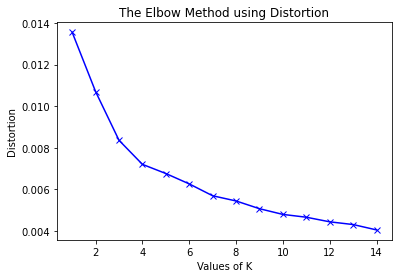

In [157]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion') 
plt.show()

In [158]:
kmeans = KMeans(n_clusters=2,  init='k-means++', n_init=10, max_iter=1000) # tester k-means méthod max?
kmeans.fit(X)
labels=kmeans.labels_


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


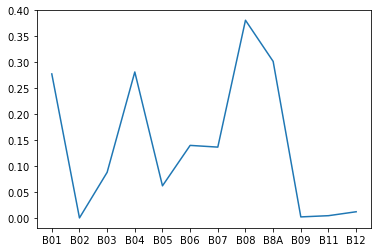

In [160]:

print(labels)
clusters_center = kmeans.cluster_centers_

diff = abs(clusters_center[0]-clusters_center[1])
diff_bis = abs(clusters_center[1]/(max(clusters_center[1]))-clusters_center[0]/(max(clusters_center[0])))
plt.plot(['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],diff_bis)
# plt.plot(['B02','B03','B04','B08','B8A'],diff_bis)

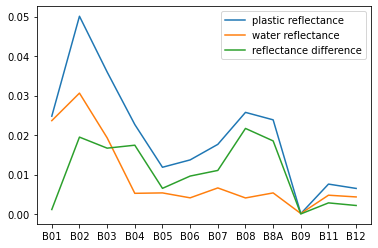

In [161]:
plt.plot(['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],clusters_center[1], label='plastic reflectance')
plt.plot(['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],clusters_center[0], label='water reflectance')
plt.plot(['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],diff, label='reflectance difference')
plt.legend()

In [162]:
img_labels=labels.reshape((ind[1]-ind[0],ind[3]-ind[2]))


(11, 10)


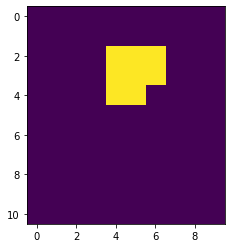

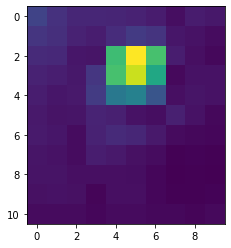

In [163]:
plt.figure()
plt.imshow(img_labels)
plt.figure()
plt.imshow(B04[ind[0]:ind[1],ind[2]:ind[3]])
print(B04[ind[0]:ind[1],ind[2]:ind[3]].shape)

## Abundance matrix for plastic : MTMF

0.1181


In [138]:
# ind=[39,50,120,130]
index_list=[1,2,3,7,8]
BS = [arrays[i] for i in index_list]
plastic_signature = np.array([ kmeans.cluster_centers_[1][i] for i in index_list]).reshape(5,1)

abundance = []

X = []
for i in range(ind[0], ind[1]):
    for j in range(ind[2], ind[3]):
        x = [e[i,j] for e in BS]
        X.append(x)
        
        
R =  np.corrcoef(np.transpose(X))
R_inv = np.linalg.inv(R)
# print(plastic_signature.shape)

for e in X:
#     print(np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature)))
    e = np.array(e)
    A = np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature))
    B = np.dot(R_inv, plastic_signature)
    res = np.dot(1/A * np.transpose(B),e)
    abundance.append(res)

IndexError: list index out of range

In [67]:
abundance = np.array(abundance)
img_abundance = abundance.reshape(11,10)

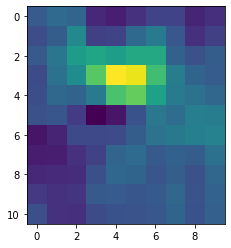

In [68]:
plt.imshow(img_abundance)

(84, 183)


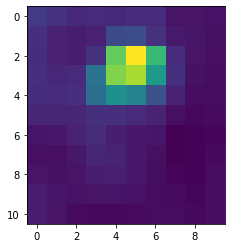

In [78]:

plt.figure()
plt.imshow(B08[ind[0]:ind[1],ind[2]:ind[3]])
print(B08.shape)

In [80]:
ind=[0,84,0,183]
index_list=[1,2,3,7,8]
BS = [arrays[i] for i in index_list]
plastic_signature = np.array([ kmeans.cluster_centers_[1][i] for i in index_list]).reshape(5,1)

abundance = []

X = []
for i in range(ind[0], ind[1]):
    for j in range(ind[2], ind[3]):
        x = [e[i,j] for e in BS]
        X.append(x)
        
        
R =  np.corrcoef(np.transpose(X))
R_inv = np.linalg.inv(R)
# print(plastic_signature.shape)

for e in X:
#     print(np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature)))
    e = np.array(e)
    A = np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature))
    B = np.dot(R_inv, plastic_signature)
    res = np.dot(1/A * np.transpose(B),e)
    abundance.append(res)

abundance = np.array(abundance)
img_abundance = abundance.reshape(84,183)

(84, 183)


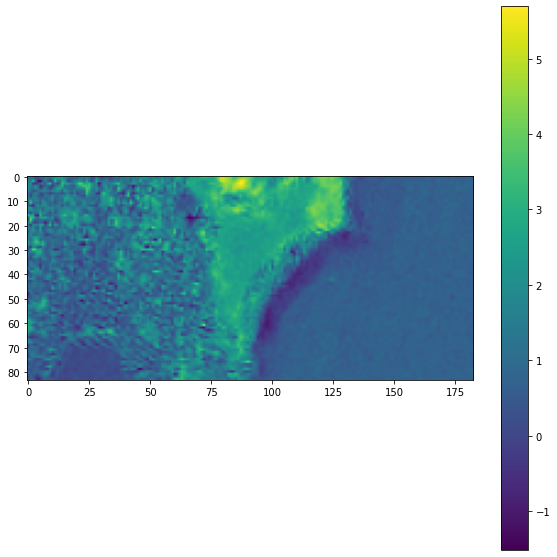

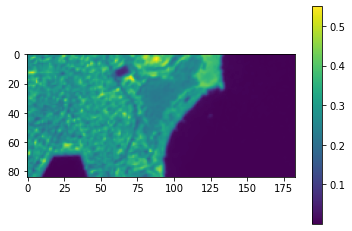

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(img_abundance)
plt.colorbar()
plt.figure()
plt.imshow(B08[ind[0]:ind[1],ind[2]:ind[3]])
plt.colorbar()
print(B08[ind[0]:ind[1],ind[2]:ind[3]].shape)

In [166]:
ind=[0,84,0,183]
index_list=range(len(arrays))
BS = [arrays[i] for i in index_list]
plastic_signature = np.array([ kmeans.cluster_centers_[1][i] for i in index_list]).reshape(len(index_list),1)

abundance = []

X = []
for i in range(ind[0], ind[1]):
    for j in range(ind[2], ind[3]):
        x = [e[i,j] for e in BS]
        X.append(x)
        
        
R =  np.corrcoef(np.transpose(X))
R_inv = np.linalg.inv(R)
# print(plastic_signature.shape)

for e in X:
#     print(np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature)))
    e = np.array(e)
    A = np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature))
    B = np.dot(R_inv, plastic_signature)
    res = np.dot(1/A * np.transpose(B),e)
    abundance.append(res)

abundance = np.array(abundance)
img_abundance = abundance.reshape(84,183)

(84, 183)


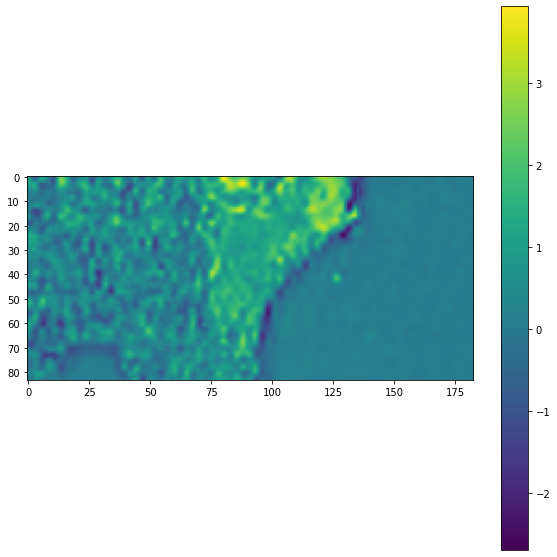

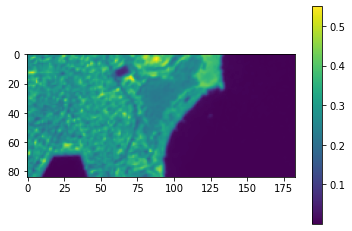

In [167]:
plt.figure(figsize=(10,10))
plt.imshow(img_abundance)
plt.colorbar()
plt.figure()
plt.imshow(B08[ind[0]:ind[1],ind[2]:ind[3]])
plt.colorbar()
print(B08[ind[0]:ind[1],ind[2]:ind[3]].shape)

## test on image 2

In [168]:
## root directory
ROOT_DIR = './2019_05_03_M/'

B04 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
B08 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B08_(Raw).tiff')

B11 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
B06 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B06_(Raw).tiff')

B01 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B01_(Raw).tiff')
B02 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
B03 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
B05 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B05_(Raw).tiff')
B07 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B07_(Raw).tiff')
B09 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B09_(Raw).tiff')

B8A = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B8A_(Raw).tiff')
B12 = tifffile.imread(ROOT_DIR+'2019-05-03-00_00_2019-05-03-23_59_Sentinel-2_L2A_B12_(Raw).tiff')

In [169]:
a,b=B04.shape
ind=[0,90,0,183]
arrays=[B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12]
# arrays=[B02,B03,B04,B08,B8A]
index_list=range(len(arrays))
BS = [arrays[i] for i in index_list]

In [170]:
abundance = []

X = []
for i in range(ind[0], ind[1]):
    for j in range(ind[2], ind[3]):
        x = [e[i,j] for e in BS]
        X.append(x)
        
        
R =  np.corrcoef(np.transpose(X))
R_inv = np.linalg.inv(R)
# print(plastic_signature.shape)

for e in X:
#     print(np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature)))
    e = np.array(e)
    A = np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature))
    B = np.dot(R_inv, plastic_signature)
    res = np.dot(1/A * np.transpose(B),e)
    abundance.append(res)

abundance = np.array(abundance)
img_abundance = abundance.reshape(a,b)

(90, 183)


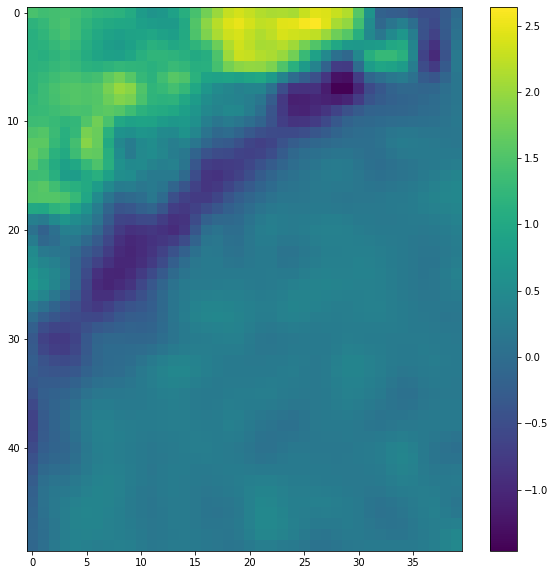

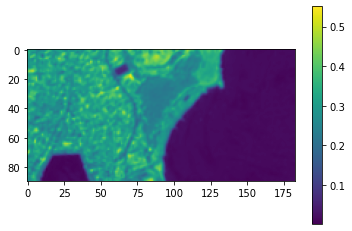

In [173]:
plt.figure(figsize=(10,10))
plt.imshow(img_abundance[20:70,100:140])
plt.colorbar()
plt.figure()
plt.imshow(B08[ind[0]:ind[1],ind[2]:ind[3]])
plt.colorbar()
print(B08[ind[0]:ind[1],ind[2]:ind[3]].shape)

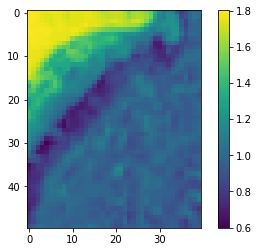

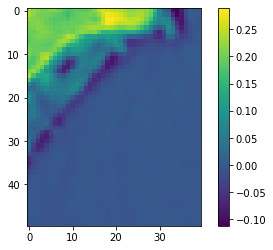

In [174]:
RNDVI =(B04-B08)/(B04+B08)
PI = B08/(B04+B08)
lambda_8 = 833.8
lambda_4 = 664.6
lambda_11 = 1613.7
lambda_6 = 740.5
FDI = B08 - ( B06 + (B11-B06)*10*(lambda_8-lambda_4)/(lambda_11-lambda_4) )

plt.figure()
plt.imshow(1-RNDVI[20:70,100:140])
plt.colorbar()
plt.figure()
plt.imshow(FDI[20:70,100:140])
plt.colorbar()

## test image 3

(84, 183)


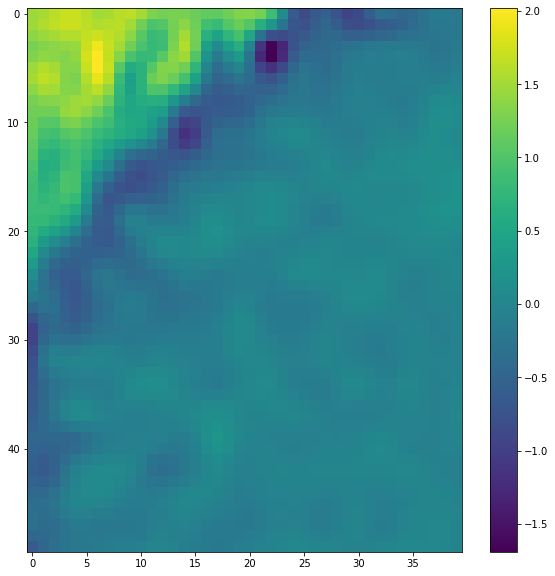

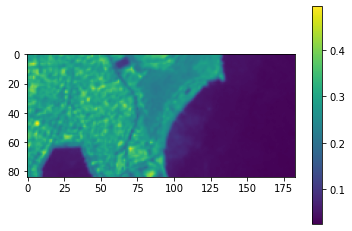

In [178]:
## root directory
ROOT_DIR = './2019_05_18_M/'

B04 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
B08 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B08_(Raw).tiff')

B11 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B11_(Raw).tiff')
B06 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B06_(Raw).tiff')

B01 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B01_(Raw).tiff')
B02 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B02_(Raw).tiff')
B03 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B03_(Raw).tiff')
B05 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B05_(Raw).tiff')
B07 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B07_(Raw).tiff')
B09 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B09_(Raw).tiff')

B8A = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B8A_(Raw).tiff')
B12 = tifffile.imread(ROOT_DIR+'2019-05-18-00_00_2019-05-18-23_59_Sentinel-2_L2A_B12_(Raw).tiff')

a,b=B04.shape
ind=[0,a,0,b]
arrays=[B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B11,B12]
# arrays=[B02,B03,B04,B08,B8A]
index_list=range(len(arrays))
BS = [arrays[i] for i in index_list]

abundance = []

X = []
for i in range(ind[0], ind[1]):
    for j in range(ind[2], ind[3]):
        x = [e[i,j] for e in BS]
        X.append(x)
        
        
R =  np.corrcoef(np.transpose(X))
R_inv = np.linalg.inv(R)
# print(plastic_signature.shape)

for e in X:
#     print(np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature)))
    e = np.array(e)
    A = np.dot(np.transpose(plastic_signature),np.dot(R_inv,plastic_signature))
    B = np.dot(R_inv, plastic_signature)
    res = np.dot(1/A * np.transpose(B),e)
    abundance.append(res)

abundance = np.array(abundance)
img_abundance = abundance.reshape(a,b)

plt.figure(figsize=(10,10))
plt.imshow(img_abundance[20:70,100:140])
plt.colorbar()
plt.figure()
plt.imshow(B08[ind[0]:ind[1],ind[2]:ind[3]])
plt.colorbar()
print(B08[ind[0]:ind[1],ind[2]:ind[3]].shape)

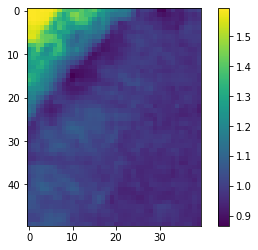

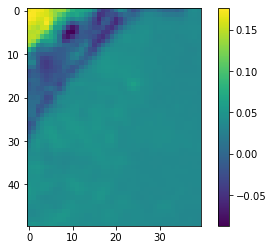

In [179]:
RNDVI =(B04-B08)/(B04+B08)
PI = B08/(B04+B08)
lambda_8 = 833.8
lambda_4 = 664.6
lambda_11 = 1613.7
lambda_6 = 740.5
FDI = B08 - ( B06 + (B11-B06)*10*(lambda_8-lambda_4)/(lambda_11-lambda_4) )

plt.figure()
plt.imshow(1-RNDVI[20:70,100:140])
plt.colorbar()
plt.figure()
plt.imshow(FDI[20:70,100:140])
plt.colorbar()